## Usando modelos para classificar câncer de mama

Neste projeto iremos aplicar algoritmos de marchine learning para predizer casos de câncer de mama, usando ensenble verficando se melhora a perfomace do modelo e aplicando rfe e pca para verificar se da pra continuar com a mesma perfomace ou aumentar e melhorar o processamento.

In [1]:
# Importando as blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Importando o arquivo csv
breast = pd.read_csv('data.csv')

In [3]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


excluindo as colunas id e unnamed:32 poque não são necessárias

In [4]:
breast.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [5]:
breast.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
breast.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Dicionário dos dados

![imagem](https://i.ibb.co/KhsWcJ2/Pasted-image-20220522092609.png)


os outros dados são variação disso e taxa de erro, além de que diagnosis que M é maligno e b é benigno.

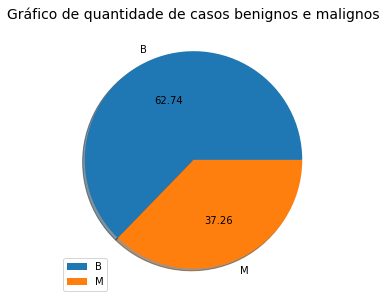

In [7]:
# Vamos verificar a quantidade de nódulos benignos e malignos esse dataset possui
plt.figure(figsize=(10,5))
plt.title('Gráfico de quantidade de casos benignos e malignos',fontsize=14)
plt.pie(breast['diagnosis'].value_counts(),shadow=True,
        labels=breast['diagnosis'].value_counts().index,
        autopct='%1.2f')
plt.legend();

Podemos ver que temos 20% a mais de casos benignos do que malignos, e talvez tenha um enviasamento dos dados, vericaremos se aplicando o método de *undersampling* para verificar se há uma melhora nos resultados

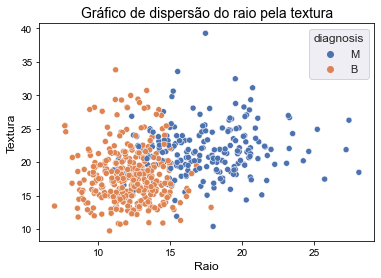

In [8]:
plt.title('Gráfico de dispersão do raio pela textura',fontsize=14)
sns.set(style='darkgrid')
sns.scatterplot(x='radius_mean',y='texture_mean',data=breast,hue='diagnosis')
plt.xlabel('Raio',fontsize=12)
plt.ylabel('Textura',fontsize=12);

Podemos ver que a partir de um certo raio, temos somento casos maligno, e na textura, só acima de 35 que temo somente um caso maligno.

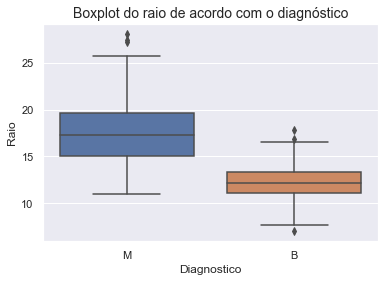

In [9]:
plt.title('Boxplot do raio de acordo com o diagnóstico',fontsize=14)
sns.boxplot(x='diagnosis',y='radius_mean',data=breast)
plt.xlabel('Diagnostico',fontsize=12)
plt.ylabel('Raio',fontsize=12);

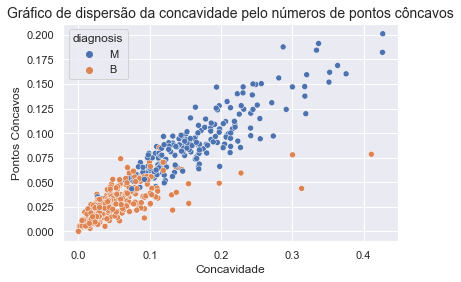

In [10]:
plt.title('Gráfico de dispersão da concavidade pelo números de pontos côncavos',fontsize=14)
sns.scatterplot(x='concavity_mean',y='concave points_mean',data=breast,hue='diagnosis')
plt.xlabel('Concavidade',fontsize=12)
plt.ylabel('Pontos Côncavos',fontsize=12);

podemos ver que nos casos malignos, os pontos côncavos só tem a partir de 0,1.

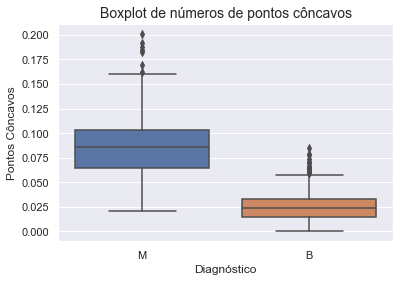

In [11]:
plt.title('Boxplot de números de pontos côncavos',fontsize=14)
sns.boxplot(x='diagnosis',y='concave points_mean',data=breast)
plt.xlabel('Diagnóstico',fontsize=12)
plt.ylabel('Pontos Côncavos',fontsize=12);

In [12]:
breast['diagnosis'] = breast['diagnosis'].map({'M':1,'B':0})

In [13]:
corr = breast.corr()['diagnosis']
print(corr)

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

In [14]:
breast.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [19]:
breast.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


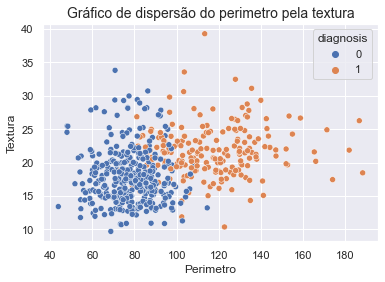

In [20]:
plt.title('Gráfico de dispersão do perimetro pela textura',fontsize=14)
sns.set(style='darkgrid')
sns.scatterplot(x='perimeter_mean',y='texture_mean',data=breast,hue='diagnosis')
plt.xlabel('Perimetro',fontsize=12)
plt.ylabel('Textura',fontsize=12);

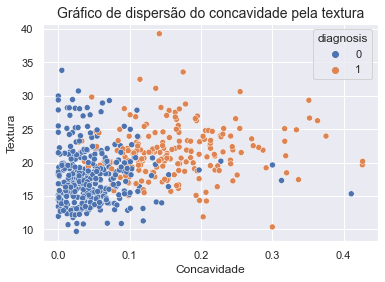

In [22]:
plt.title('Gráfico de dispersão do concavidade pela textura',fontsize=14)
sns.set(style='darkgrid')
sns.scatterplot(x='concavity_mean',y='texture_mean',data=breast,hue='diagnosis')
plt.xlabel('Concavidade',fontsize=12)
plt.ylabel('Textura',fontsize=12);